In [29]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import pandas as pd
import numpy as np

# Visualizaciones
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree

# Para realizar la regresión lineal y la evaluación del modelo
# -----------------------------------------------------------------------
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import sys
sys.path.append("../../")
from src.soporte_metricas import(
    generar_df_comparador,
    scatterplot_regresion,
    residual_plot,
    obtener_metricas
)

In [30]:
df = pd.read_csv("../../datos/06_rent_outliers_gestionados.csv")

In [31]:
df.shape

(441, 34)

# Realizamos Regresión Lineal

### Dividimos los Grupos (70% train y 30% test)

In [32]:
X = df.drop(columns="price")
y = df[["price"]]

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7,random_state=42)

### Generamos Regresión Lineal

In [34]:
modelo_lineal = LinearRegression()
modelo_lineal.fit(X_train,y_train)

LinearRegression()

### Hacemos predicciones de Precio del 70% y el 30%
Con ello veremos que tan bien se le da a nuestro modelo predecir


In [35]:
y_train_pred = modelo_lineal.predict(X_train)
y_train_pred[:3]

array([[657.60776623],
       [718.93556497],
       [489.42985751]])

In [36]:
y_test_pred = modelo_lineal.predict(X_test)
y_test_pred[:3]

array([[748.46908807],
       [674.42797141],
       [671.32369943]])

# Veamos las métricas

In [37]:
obtener_metricas(y_train,y_train_pred,y_test,y_test_pred)

,r2_score,MAE,MSE,RMSE
train,0.595676,37.831696,2400.588835,48.995804
test,0.585887,43.210865,3048.204938,55.210551


### No son perfectas pero...
- Están bien!, el error lo podremos rebajar y el overfitting también 
- Estos datos no son lineales, algo clave en porque no se ajustan mejor los datos...
- Pero si es verdad que nos indican que este modelo está diseñado de manera correcta

# Visualizar Modelo
- Así vemos que tal se ajusta a la realidad

In [38]:
df_comparador = generar_df_comparador(X_train,X_test,y_train,y_test,y_train_pred,y_test_pred,"price_pred")

In [39]:
comparaciones = df_comparador[["price","price_pred"]]

In [40]:
comparaciones["diferencia"] = comparaciones["price_pred"] - comparaciones["price"]
comparaciones.head()

,price,price_pred,diferencia
0,701.99,716.930448,14.940448
1,750.00,754.604581,4.604581
2,750.00,704.523311,-45.476689
3,400.00,470.240693,70.240693
4,450.00,569.028699,119.028699


# Scatter Plot 
- Con su línea de Regresión

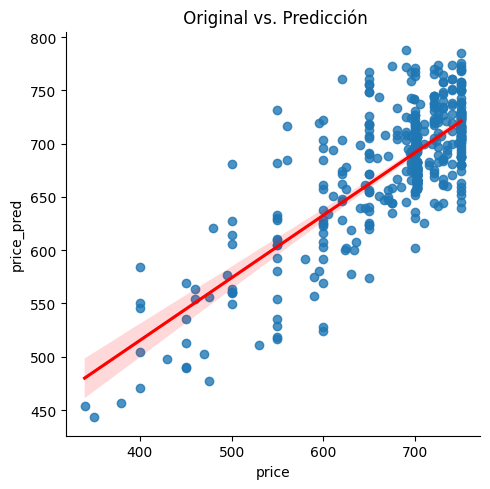

In [41]:
scatterplot_regresion(df_comparador,"price","price_pred")

# Sobre la gráfica
- Confirma que las predicciones se acercan a la realidad
- Si es verdad que como nos faltan datos de los más baratos, el modelo tiende a no acercarse tanto

# Residual Plot

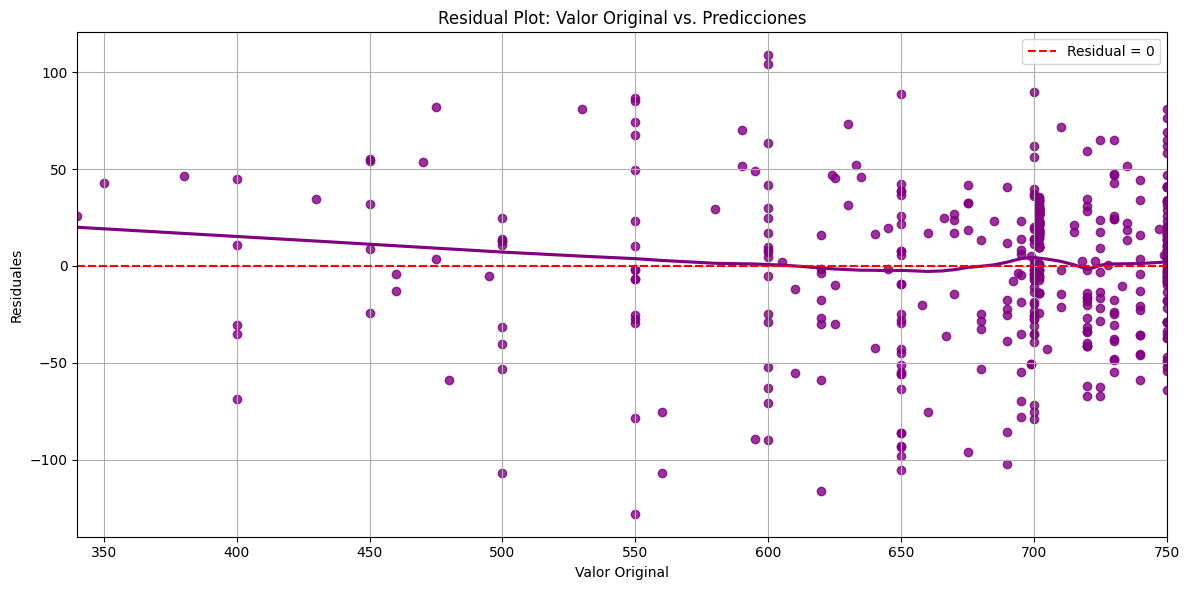

In [42]:
residual_plot(df_comparador,"price","price_pred")

# Sobre la gráfica
- Está encontrando problemas en los precios extremos
- En los precios intermedios se ajusta mejor
- En las casas más baratas tiende a sobre-estimar los precios

- Esto nos vuelve a indicar que la regresión Lineal no es el mejor modelo para nosotros, pasemos a Modelos no Lineales